# SPATIAL QUERYING

---

Spatial querying refers to seeking and retrieving information about the environment, such as:

- Cell coordinates for a cell position
- Cell positions within a specified cluster
- Corner coordinates for a set or cluster of cell positions
- Overlaps between figures within the environment

---

**NOTE**: _Any reference to "figure" refers to a straight-edged convex figure._

---

**Contents**:

1. [Multiple Grid Cell Corner Coords Retrieval](tests.ipynb#1.-Multiple-Grid-Cell-Corner-Coords-Retrieval)
    - 1.1. Input Grid Position List
    - 1.2. Input Grid Position Cluster
    - 1.3. Input Grid Position Cluster (Optimised Version)
2. [Grid Cell Cluster Filtering for Obstacles](tests.ipynb#2.-Grid-Cell-Cluster-Filtering-for-Obstacles)
3. [Figure Overlap Detection](tests.ipynb#3.-Figure-Overlap-Detection)
    - 3.1. Single Test Case
    - 3.2. Randomised Test Cases
    - 3.3. Systematic Test Cases
    - 3.4. Multiple Figure Overlap Detection
4. [Axis-Aligned Bounding Box for Box](tests.ipynb#4.-Axis-Aligned-Bounding-Box-for-Box)

# 1. Multiple Grid Cell Corner Coords Retrieval

## 1.1. Input Grid Position List

,Cell,P1,P2,P3,P4
0,"(2, 4)","[20.0, 14.0]","[25.0, 14.0]","[25.0, 21.0]","[20.0, 21.0]"
1,"(1, 2)","[10.0, 7.0]","[15.0, 7.0]","[15.0, 14.0]","[10.0, 14.0]"
2,"(3, 1)","[5.0, 21.0]","[10.0, 21.0]","[10.0, 28.0]","[5.0, 28.0]"


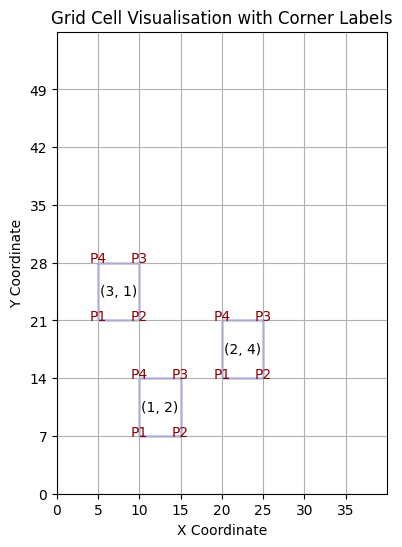

In [1]:
import multiple_grid_cell_corner_coords_retrieval.input_grid_positions_list

## 1.2. Input Grid Position Cluster
A cluster is defined by 2 ranges:

- $[i_1, i_2)$ (for row indices)
- $[j_1, j_2)$ (for column indices)


Row Range: [0, 3), Column Range: [2, 6)



,Cell,P1,P2,P3,P4
0,"[0, 2]","[10.0, 0.0]","[15.0, 0.0]","[15.0, 7.0]","[10.0, 7.0]"
1,"[0, 3]","[15.0, 0.0]","[20.0, 0.0]","[20.0, 7.0]","[15.0, 7.0]"
2,"[0, 4]","[20.0, 0.0]","[25.0, 0.0]","[25.0, 7.0]","[20.0, 7.0]"
3,"[0, 5]","[25.0, 0.0]","[30.0, 0.0]","[30.0, 7.0]","[25.0, 7.0]"
4,"[1, 2]","[10.0, 7.0]","[15.0, 7.0]","[15.0, 14.0]","[10.0, 14.0]"
5,"[1, 3]","[15.0, 7.0]","[20.0, 7.0]","[20.0, 14.0]","[15.0, 14.0]"
6,"[1, 4]","[20.0, 7.0]","[25.0, 7.0]","[25.0, 14.0]","[20.0, 14.0]"
7,"[1, 5]","[25.0, 7.0]","[30.0, 7.0]","[30.0, 14.0]","[25.0, 14.0]"
8,"[2, 2]","[10.0, 14.0]","[15.0, 14.0]","[15.0, 21.0]","[10.0, 21.0]"
9,"[2, 3]","[15.0, 14.0]","[20.0, 14.0]","[20.0, 21.0]","[15.0, 21.0]"


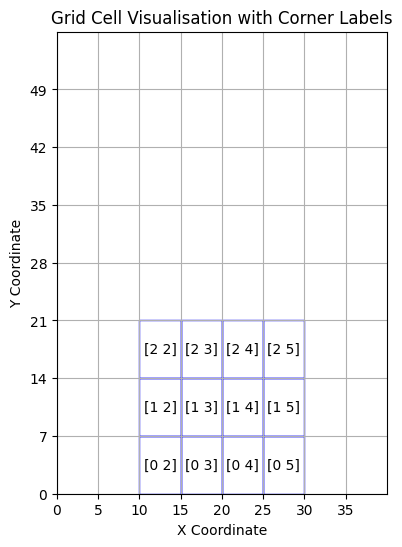

In [1]:
import multiple_grid_cell_corner_coords_retrieval.input_grid_position_cluster

## 1.3. Input Grid Position Cluster (Optimised Version)
The optimisation is in processing corner coordinates:

_Instead of sequential processing, they are processed together in a NumPy array._


Row Range: [0, 3), Column Range: [2, 6)


Shape of Positions Array: (12, 2)


Corner Coordinate Array:
[[10.  0. 15.  0. 15.  7. 10.  7.]
 [15.  0. 20.  0. 20.  7. 15.  7.]
 [20.  0. 25.  0. 25.  7. 20.  7.]
 [25.  0. 30.  0. 30.  7. 25.  7.]
 [10.  7. 15.  7. 15. 14. 10. 14.]
 [15.  7. 20.  7. 20. 14. 15. 14.]
 [20.  7. 25.  7. 25. 14. 20. 14.]
 [25.  7. 30.  7. 30. 14. 25. 14.]
 [10. 14. 15. 14. 15. 21. 10. 21.]
 [15. 14. 20. 14. 20. 21. 15. 21.]
 [20. 14. 25. 14. 25. 21. 20. 21.]
 [25. 14. 30. 14. 30. 21. 25. 21.]]



,Cell,P1,P2,P3,P4
0,"[0, 2]","[10.0, 0.0]","[15.0, 0.0]","[15.0, 7.0]","[10.0, 7.0]"
1,"[0, 3]","[15.0, 0.0]","[20.0, 0.0]","[20.0, 7.0]","[15.0, 7.0]"
2,"[0, 4]","[20.0, 0.0]","[25.0, 0.0]","[25.0, 7.0]","[20.0, 7.0]"
3,"[0, 5]","[25.0, 0.0]","[30.0, 0.0]","[30.0, 7.0]","[25.0, 7.0]"
4,"[1, 2]","[10.0, 7.0]","[15.0, 7.0]","[15.0, 14.0]","[10.0, 14.0]"
5,"[1, 3]","[15.0, 7.0]","[20.0, 7.0]","[20.0, 14.0]","[15.0, 14.0]"
6,"[1, 4]","[20.0, 7.0]","[25.0, 7.0]","[25.0, 14.0]","[20.0, 14.0]"
7,"[1, 5]","[25.0, 7.0]","[30.0, 7.0]","[30.0, 14.0]","[25.0, 14.0]"
8,"[2, 2]","[10.0, 14.0]","[15.0, 14.0]","[15.0, 21.0]","[10.0, 21.0]"
9,"[2, 3]","[15.0, 14.0]","[20.0, 14.0]","[20.0, 21.0]","[15.0, 21.0]"


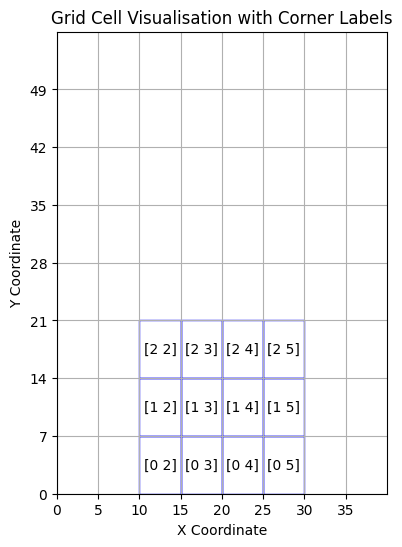

In [ ]:
import multiple_grid_cell_corner_coords_retrieval.input_grid_position_cluster_optimised

# 2. Grid Cell Cluster Filtering for Obstacles
- Blue squares are obstacle cells
- White squares are free-space cells
- The orange dashed line is the queried cluster
- The red 'X' marks cells which the code identified as having obstacles


Obstacle Grid:

. . X . . .
X . . X . .
. X . . . X
. . . . X .
. . X . . .

------------------------------------------------
TEST CASE 1: Obstacles Found


Obstacle Positions (size = 4):
[[1 3]
 [3 4]]



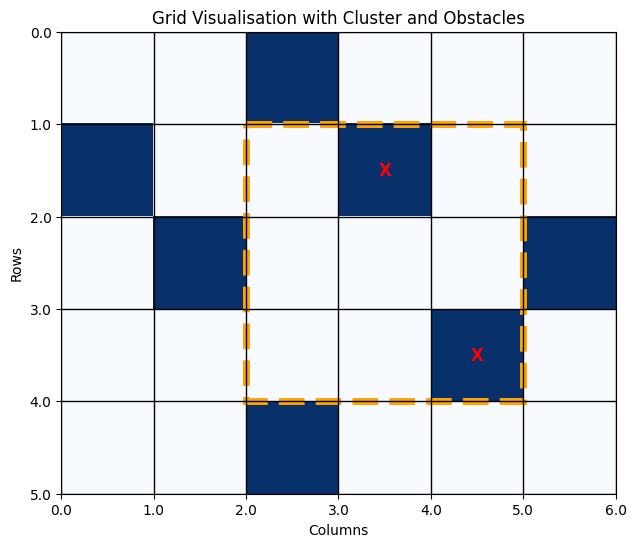


------------------------------------------------
TEST CASE 2: No Obstacles Found


Obstacle Positions (size = 0):
[]



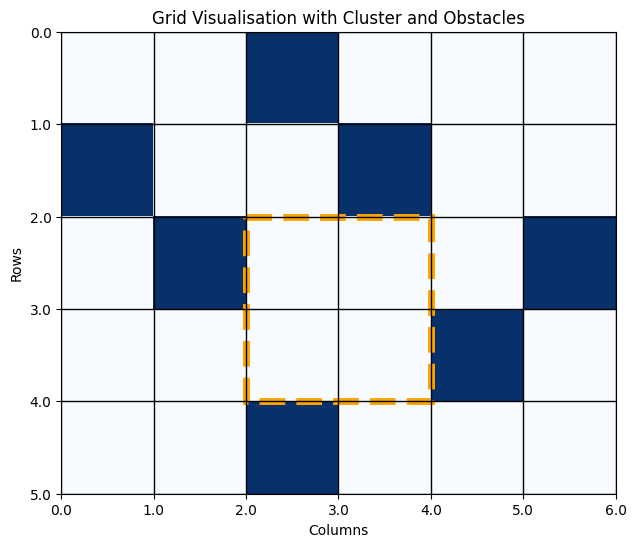

In [1]:
import grid_cell_cluster_filtering_for_obstacles

# 3. Figure Overlap Detection

## 3.1. Single Test Case

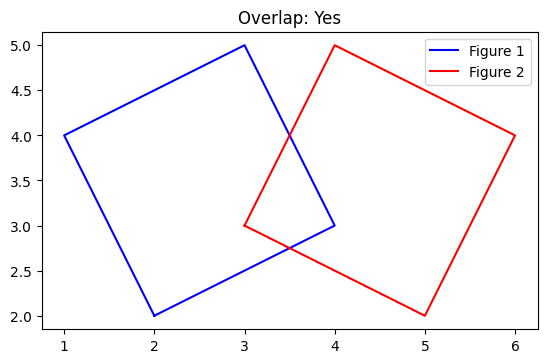

In [1]:
import figure_overlap_detection.single_test_case

## 3.2. Randomised Test Cases

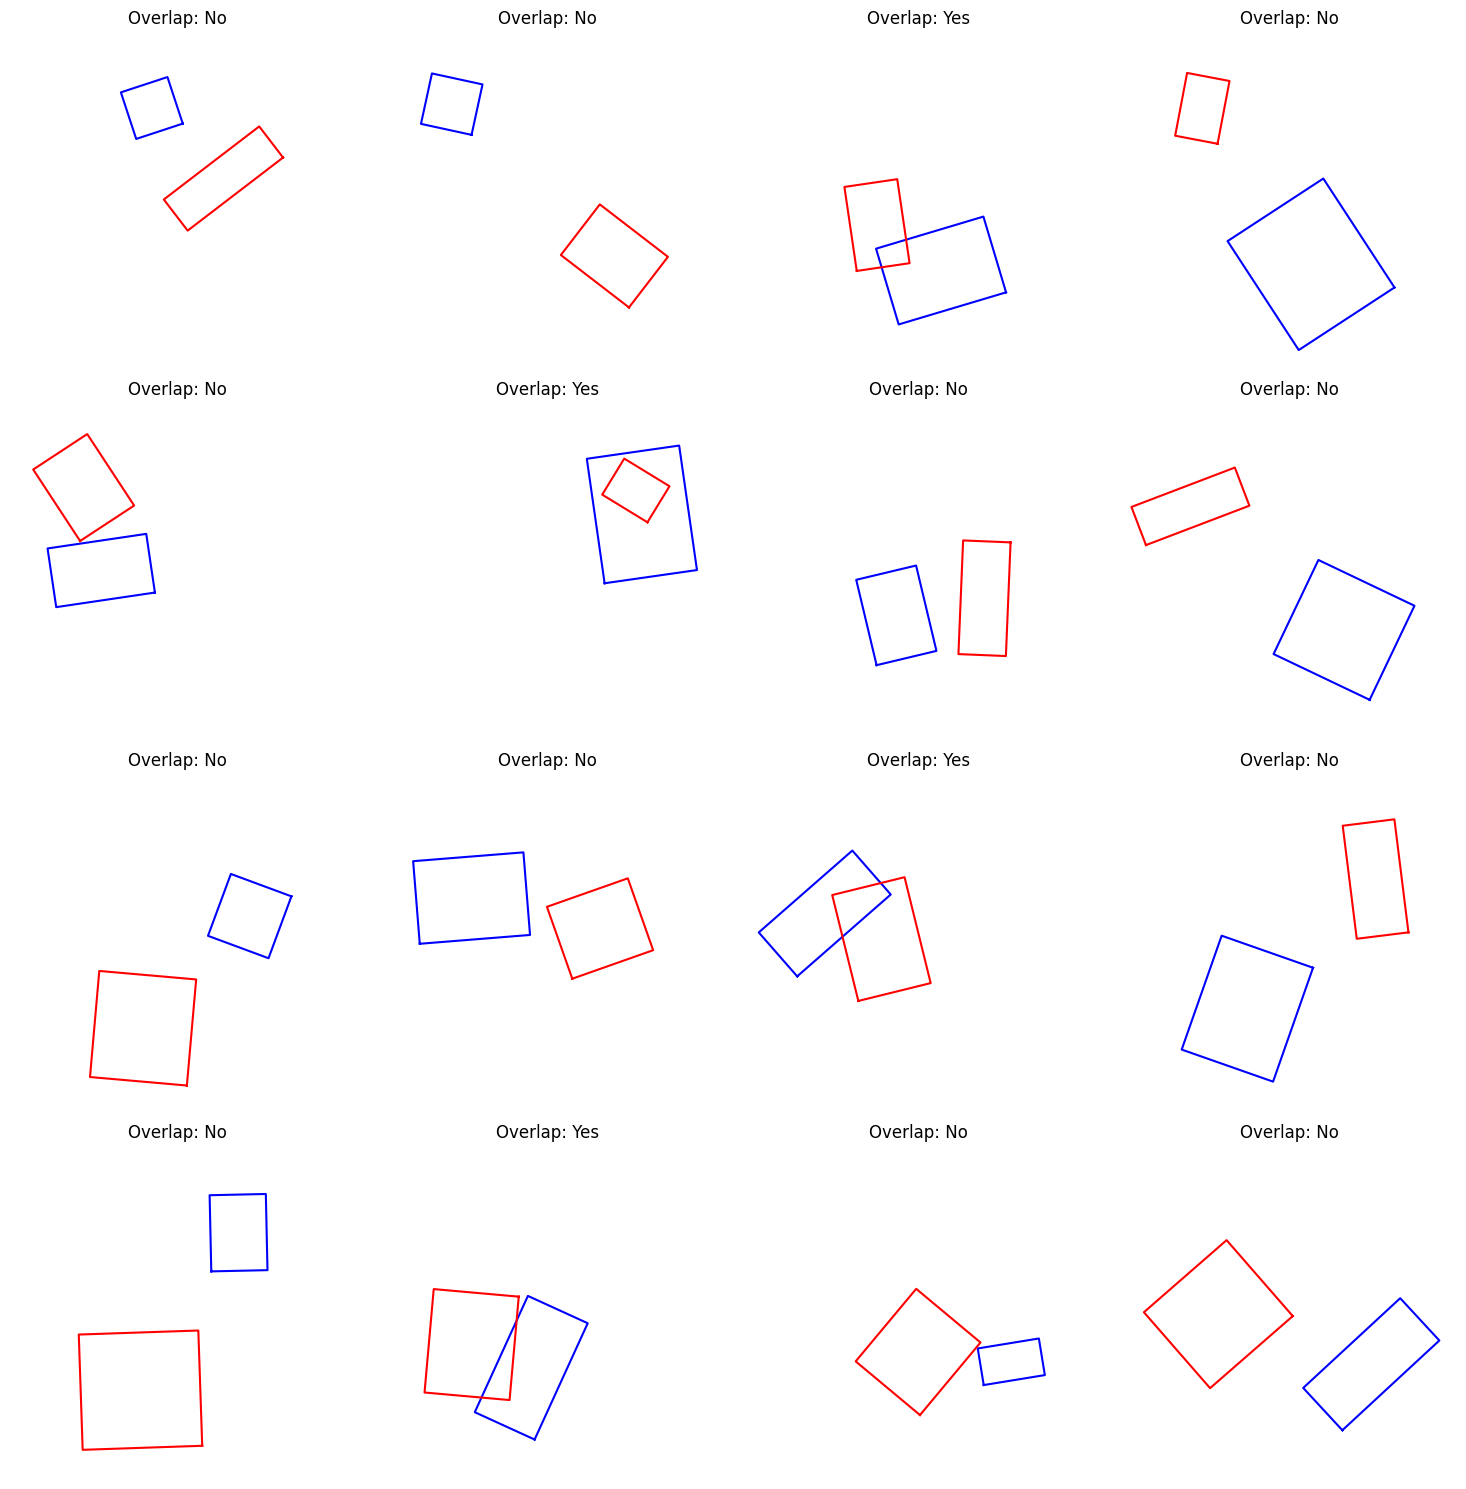

In [2]:
import figure_overlap_detection.randomised_test_cases

## 3.3. Systematic Test Cases

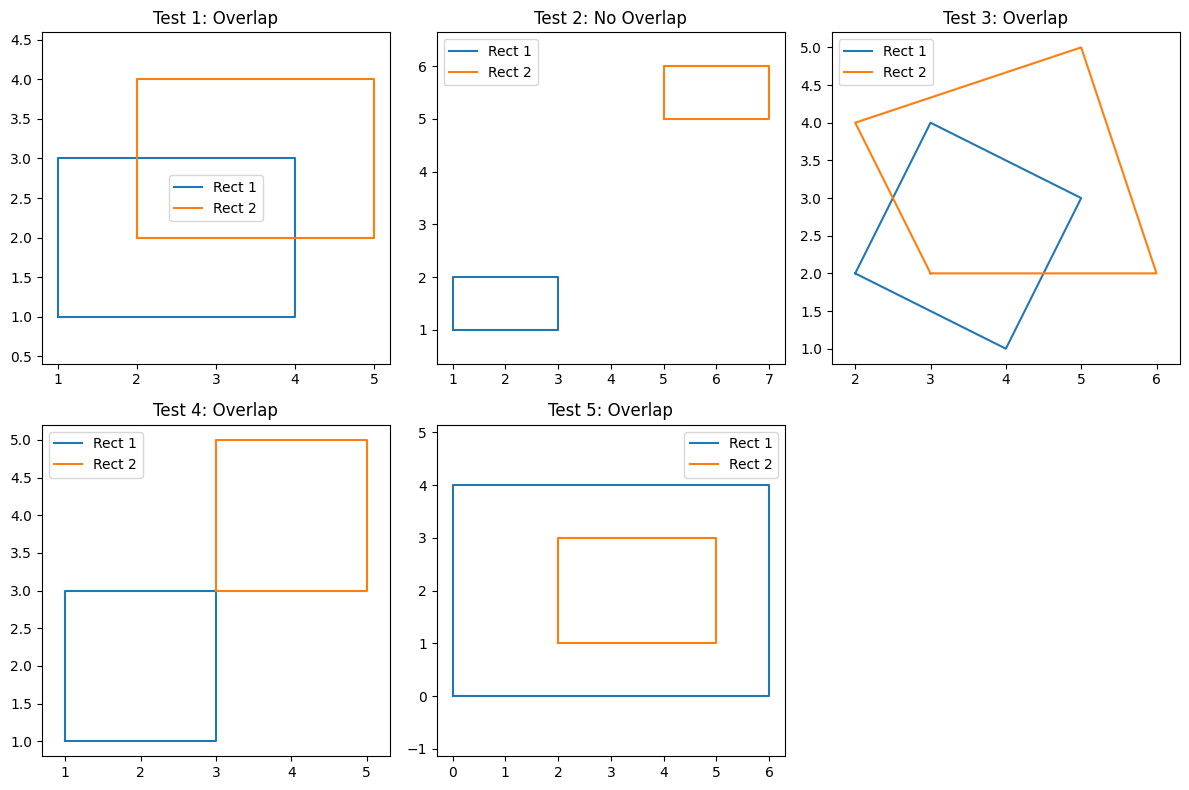

In [3]:
import figure_overlap_detection.systematic_test_cases

## 3.4. Multiple Figure Overlap Detection

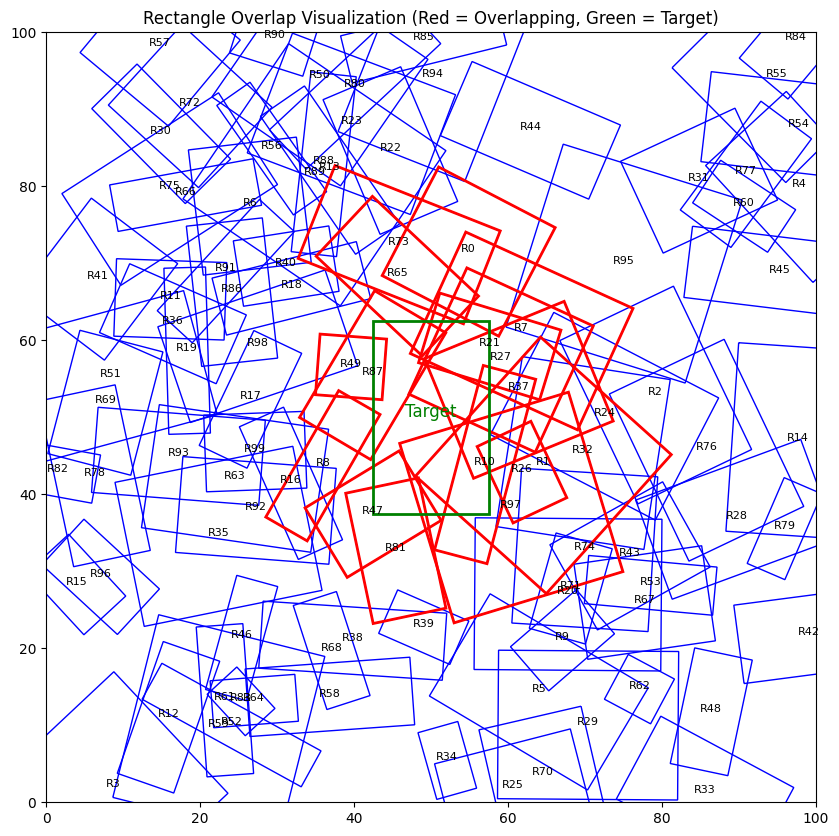

In [4]:
import figure_overlap_detection.multi_fig_overlap

# 4. Axis-Aligned Bounding Box for Box

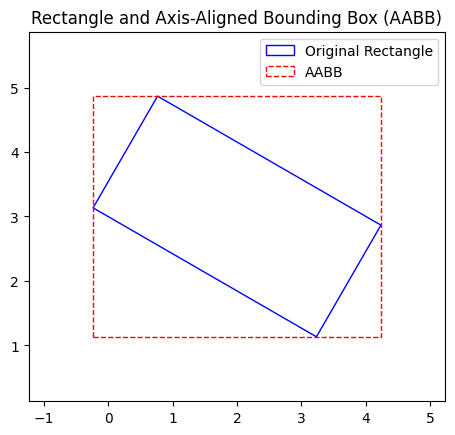

In [1]:
import axis_aligned_bbox_for_box